In [67]:
import numpy as np

In [152]:
emb = np.load('./exp/Himia_80FBANK_RepVGG_A0_ASP_MQMHASTP_all_AAMsoftmax_256/repvgg_asp_dev_1m_39.npy',allow_pickle=True).item()

In [90]:
import pandas as pd

In [153]:
data = pd.DataFrame(data=emb).T

In [154]:
label = data.index.map(lambda x: x.split('_')[0]).tolist()

In [155]:
from sklearn.manifold import TSNE 
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(data)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_std)
X_tsne_data = np.vstack((X_tsne.T, label)).T
df_tsne = pd.DataFrame(X_tsne_data, columns=['x1','x2' , 'label']) 
df_tsne['x1'] = df_tsne['x1'].astype(np.float32)
df_tsne['x2'] = df_tsne['x2'].astype(np.float32)

d:\Anaconda3\envs\hahally\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\Anaconda3\envs\hahally\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


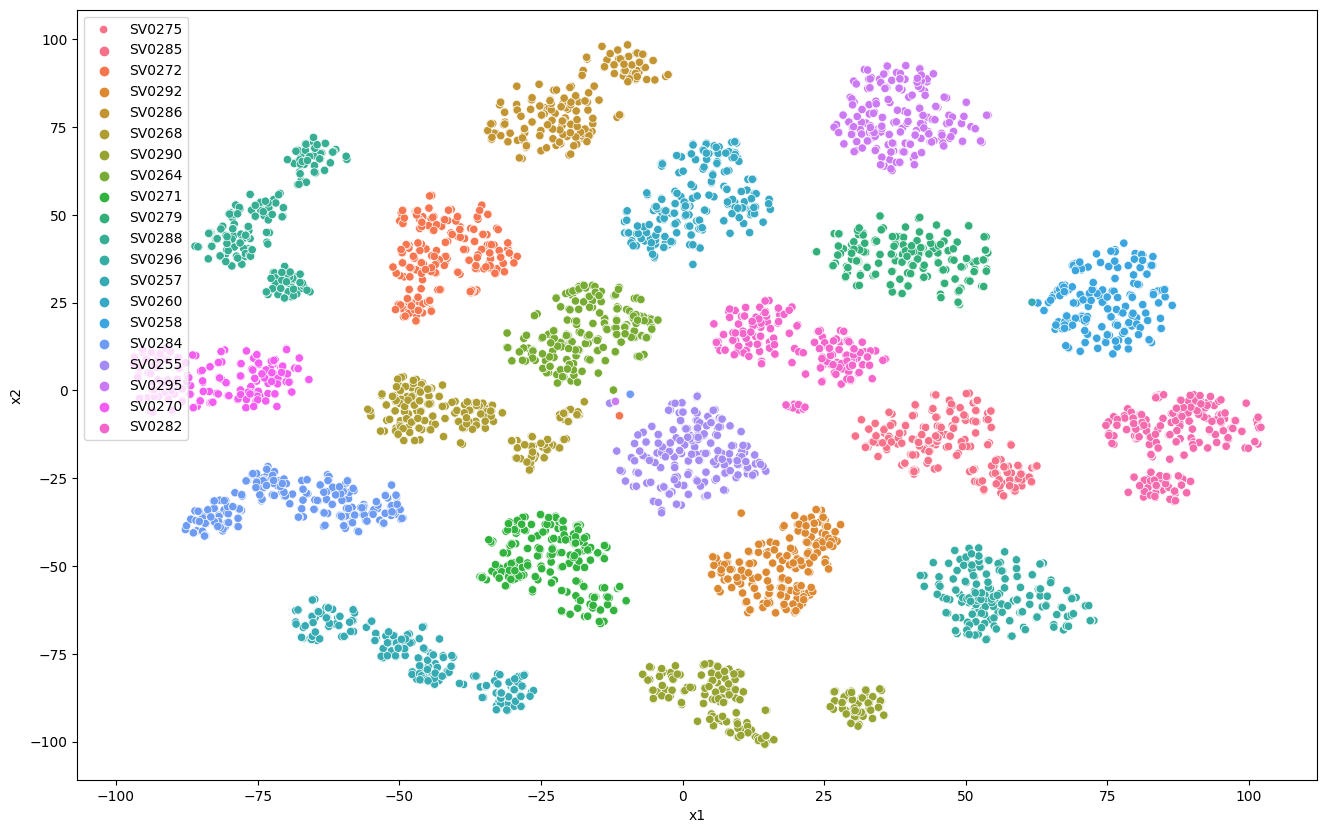

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df_tsne, hue='label', x='x1', y='x2')
plt.legend(labels = set(label),loc = 'upper left')
plt.show()

---

In [114]:
# 类间与类内偏移
data.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
SV0292_7_01_N3844.wav,-0.198272,0.275847,0.066841,-0.464766,0.465524,0.358566,0.569182,-0.112034,-0.019884,0.456644,...,-0.185526,-0.374330,-0.112378,-0.112068,-0.017524,0.414603,0.118958,-0.337261,-0.489695,-0.170730
SV0282_7_01_N3855.wav,-0.040390,-0.120707,0.426213,-0.829149,-0.478979,0.232035,0.486895,0.040577,0.280012,-0.320667,...,0.318638,-0.256040,0.563004,0.522068,-0.512743,0.362411,0.843227,0.270265,0.057488,-0.266794
SV0279_2_06_S1020.wav,0.122903,0.060771,0.326002,-0.010726,0.290939,0.147540,-0.809431,0.208120,-0.298217,-0.032514,...,-0.473034,0.468163,0.079861,0.397278,0.631723,0.166659,-0.048251,-0.056774,1.608010,0.251031
SV0282_2_12_F0278.wav,-0.395401,0.361205,0.275234,0.027985,-0.374572,0.304645,0.261819,0.328795,-0.076560,-0.559230,...,0.257667,-0.100548,0.553929,0.361033,-0.262718,0.076630,0.093860,-0.158486,-0.218518,-0.084298
SV0260_7_01_F3873.wav,0.157797,-0.182204,0.112706,-0.350252,0.152016,0.199409,0.192399,0.080826,-0.017633,0.055088,...,0.674122,-0.002375,0.391606,-0.072368,0.187646,-0.145016,0.039887,0.014556,0.382495,0.020094


In [118]:
data['utt'] = data.index
data = data.reset_index(drop=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,utt
0,-0.198272,0.275847,0.066841,-0.464766,0.465524,0.358566,0.569182,-0.112034,-0.019884,0.456644,...,-0.374330,-0.112378,-0.112068,-0.017524,0.414603,0.118958,-0.337261,-0.489695,-0.170730,SV0292_7_01_N3844.wav
1,-0.040390,-0.120707,0.426213,-0.829149,-0.478979,0.232035,0.486895,0.040577,0.280012,-0.320667,...,-0.256040,0.563004,0.522068,-0.512743,0.362411,0.843227,0.270265,0.057488,-0.266794,SV0282_7_01_N3855.wav
2,0.122903,0.060771,0.326002,-0.010726,0.290939,0.147540,-0.809431,0.208120,-0.298217,-0.032514,...,0.468163,0.079861,0.397278,0.631723,0.166659,-0.048251,-0.056774,1.608010,0.251031,SV0279_2_06_S1020.wav
3,-0.395401,0.361205,0.275234,0.027985,-0.374572,0.304645,0.261819,0.328795,-0.076560,-0.559230,...,-0.100548,0.553929,0.361033,-0.262718,0.076630,0.093860,-0.158486,-0.218518,-0.084298,SV0282_2_12_F0278.wav
4,0.157797,-0.182204,0.112706,-0.350252,0.152016,0.199409,0.192399,0.080826,-0.017633,0.055088,...,-0.002375,0.391606,-0.072368,0.187646,-0.145016,0.039887,0.014556,0.382495,0.020094,SV0260_7_01_F3873.wav


In [127]:
# 类内
data['spk'] = data['utt'].map(lambda x: x.split('_')[0])
data['dis'] = data['utt'].map(lambda x: x.split('_')[1])

In [128]:
data[(data.spk=='SV0292')&(data.dis=='7')]

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,utt,spk,dis
0,-0.198272,0.275847,0.066841,-0.464766,0.465524,0.358566,0.569182,-0.112034,-0.019884,0.456644,...,-0.112068,-0.017524,0.414603,0.118958,-0.337261,-0.489695,-0.170730,SV0292_7_01_N3844.wav,SV0292,7
32,-0.279265,0.499999,0.087362,-0.334153,0.091075,0.086724,0.563280,-0.055376,-0.063944,0.325759,...,-0.019069,0.007138,-0.130490,0.488884,-0.217208,-0.769850,-0.262341,SV0292_7_01_N3914.wav,SV0292,7
53,-0.223332,0.697518,0.124907,-0.395239,0.491066,0.015830,0.332543,0.505729,-0.097754,0.307530,...,0.239660,0.016306,-0.016905,0.311141,-0.116744,-0.347680,-0.379586,SV0292_7_01_F3863.wav,SV0292,7
97,-0.194462,0.595327,0.119102,-0.558182,0.359600,-0.155993,0.666622,-0.231554,-0.262391,0.766967,...,-0.146154,0.188581,-0.067037,0.297628,-0.016669,-0.413445,-0.785744,SV0292_7_01_N3902.wav,SV0292,7
126,-0.095556,0.582372,0.036670,-0.442707,0.255153,-0.428516,0.501626,0.095160,-0.332878,0.565661,...,-0.090136,-0.114204,0.303914,0.332339,-0.141052,-0.780160,-0.686665,SV0292_7_01_S3884.wav,SV0292,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6721,-0.224584,0.526847,0.342858,-0.344645,0.674817,0.221550,0.248731,0.514842,0.177072,0.332227,...,0.334190,0.004466,0.026512,-0.029226,-0.027354,-0.154132,-0.238006,SV0292_7_01_F3869.wav,SV0292,7
6982,-0.250945,0.375677,0.099325,-0.276743,0.036909,0.020725,0.612345,-0.508965,-0.270085,0.461638,...,-0.238046,-0.132588,0.141019,0.558285,-0.236158,-0.544169,-0.184808,SV0292_7_01_N3910.wav,SV0292,7
7068,-0.138861,0.647456,-0.006285,-0.258335,0.218082,-0.526334,0.585215,0.117823,-0.264891,0.520688,...,-0.018187,0.213585,0.381555,0.227734,-0.047999,-0.830977,-0.527348,SV0292_7_01_S3897.wav,SV0292,7
7161,0.384279,0.710859,-0.137563,-0.085281,-0.633367,-0.238378,0.904825,-0.294649,-0.321240,0.410409,...,-0.362676,-0.088821,0.351456,0.065777,-0.305838,-0.815438,-0.133411,SV0292_7_01_N3905.wav,SV0292,7


<AxesSubplot:>

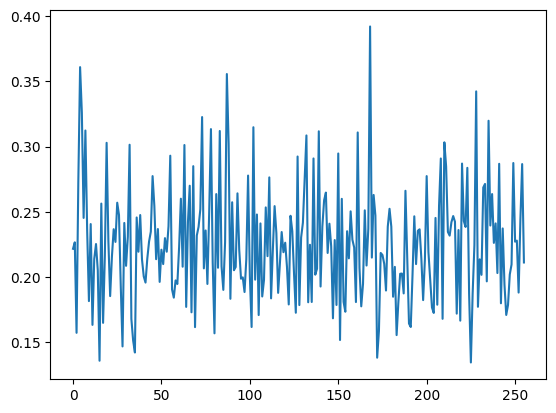

In [130]:
data[(data.spk=='SV0292')&(data.dis=='2')].describe().iloc[2].plot()

In [145]:
x1 = data[(data.spk=='SV0282')&(data.dis=='7')].describe().iloc[2]
x2 = data[(data.spk=='SV0292')&(data.dis=='7')].describe().iloc[2]

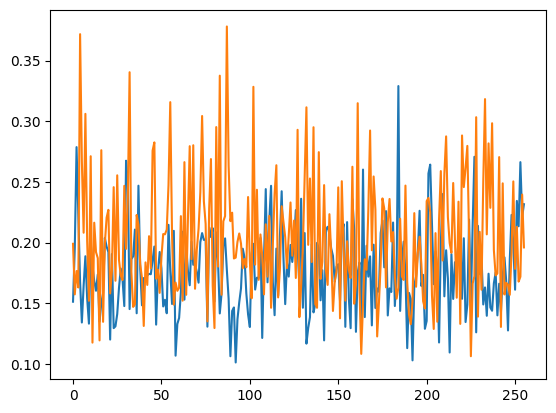

In [146]:
plt.plot(x1.index,x1.values)
plt.plot(x2.index,x2.values)